<a href="https://colab.research.google.com/github/BHUMIKA-2110/Data-Analysis/blob/main/TASK2_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load Titanic Dataset**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**2. Data Cleaning**                   
a) Check missing values

In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


b) Handle missing Age values

In [5]:
df["Age"].fillna(df["Age"].median(), inplace=True)

/tmp/ipython-input-1567474574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


c) Verify cleaning

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


**3. Data Analysis**

Q1. Who survived more: males or females?

In [7]:
df.groupby("Sex")["Survived"].mean()

,Survived
Sex,
female,1.0
male,0.0


Answer- ***Females survived more** than males.*

Q2. Did passenger class affect survival chances?

In [8]:
df.groupby("Pclass")["Survived"].mean()

,Survived
Pclass,
1,0.467290
2,0.322581
3,0.330275


Answer- ***1st class passengers had the highest survival rate**, followed by 2nd and 3rd class.*

Q3. What was the survival rate by age group?

In [9]:
bins=[0,12,18,35,60,100]
labels=["Child","Teenager","Young Adult","Adult","Senior"]
df["Age_Group"]=pd.cut(df["Age"],bins=bins,labels=labels)
df.groupby("Age_Group")["Survived"].mean()

/tmp/ipython-input-490699364.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["Survived"].mean()


,Survived
Age_Group,
Child,0.480000
Teenager,0.413793
Young Adult,0.335907
Adult,0.393617
Senior,0.363636


Answer-***Children and young adults had higher survival rates**, while seniors had the lowest.*

**4. Data Visualization**

Bar Chart – Survival by Gender

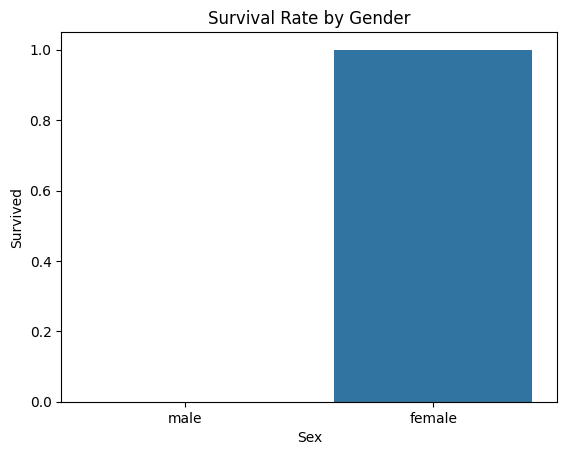

In [10]:
sns.barplot(x="Sex",y="Survived",data=df)
plt.title("Survival Rate by Gender")
plt.show()

Bar Chart – Survival by Passenger Class

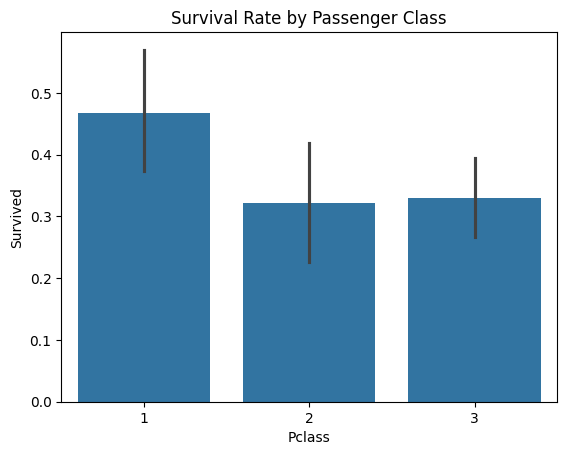

In [11]:
sns.barplot(x="Pclass",y="Survived",data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

Histogram – Passenger Ages

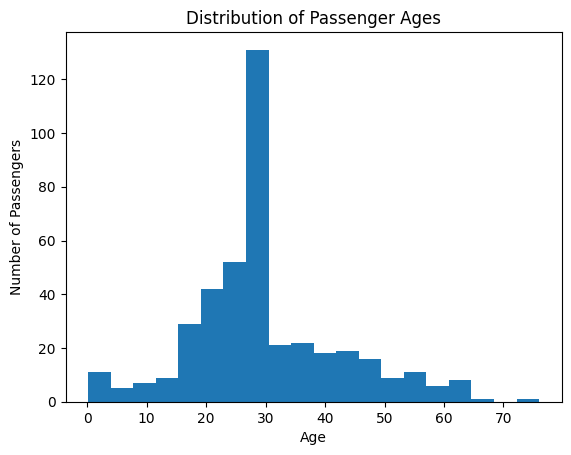

In [12]:
plt.hist(df["Age"],bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passenger Ages")
plt.show()

Conclusion-

The Titanic dataset was analyzed to understand survival patterns among passengers. Missing age values were handled using the median to ensure clean and reliable data. The analysis showed that **female passengers had a higher survival rate than males**, indicating priority during rescue operations. Passenger class played a significant role in survival, with **first-class passengers having the highest survival chances**. Age-based analysis revealed that **children and younger passengers were more likely to survive** compared to older passengers. This task demonstrated effective data cleaning, analysis, and visualization techniques using Python.